In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [5]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6490,FDR01,5.405,Regular,0.053577,Canned,200.5742,OUT013,1987,High,Tier 3,Supermarket Type1,2388.8904
4431,FDU40,20.850,Low Fat,0.037397,Frozen Foods,193.8478,OUT035,2004,Small,Tier 2,Supermarket Type1,2712.4692
7752,FDC17,NaN,Low Fat,0.015386,Frozen Foods,208.9928,OUT027,1985,Medium,Tier 3,Supermarket Type3,9678.0688
8396,DRZ11,8.850,Regular,0.112893,Soft Drinks,123.3388,OUT045,2002,NaN,Tier 2,Supermarket Type1,2972.1312
2838,FDH05,NaN,Regular,0.090473,Frozen Foods,229.7984,OUT027,1985,Medium,Tier 3,Supermarket Type3,6024.1584


In [6]:
data.shape

(8523, 12)

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
percent = data.isnull().sum()*100/len(data)

In [11]:
print(percent)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [13]:
data.duplicated().any()

False

In [14]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [15]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [16]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [17]:
mean_weight = data['Item_Weight'].mean()

In [18]:
median_weight = data['Item_Weight'].median()

In [19]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [21]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)

In [22]:
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [23]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [24]:
print("Intial Weight Variance",data['Item_Weight'].var())
print("Variance post mean imputation",data['Item_Weight_mean'].var())
print("Variance post median imputation",data['Item_Weight_median'].var())

Intial Weight Variance 21.56168825983637
Variance post mean imputation 17.860121735060453
Variance post median imputation 17.869561454073366


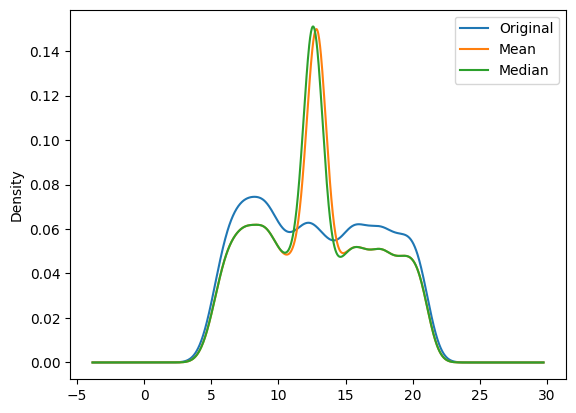

In [25]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

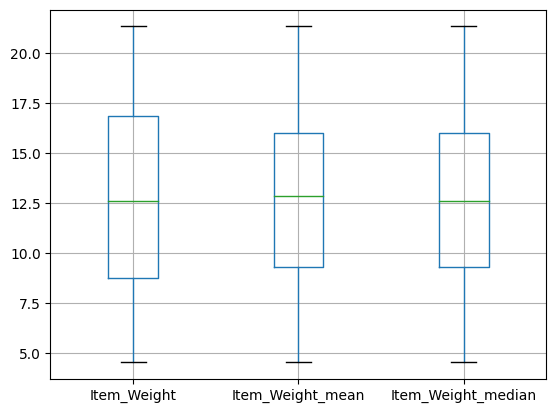

In [26]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

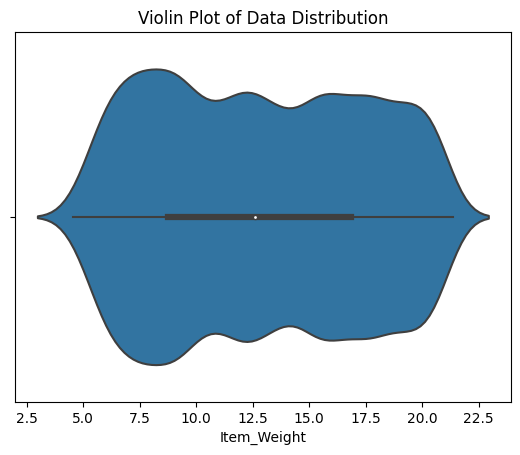

In [27]:
sns.violinplot(x='Item_Weight', data=data)

plt.title('Violin Plot of Data Distribution')

plt.show()

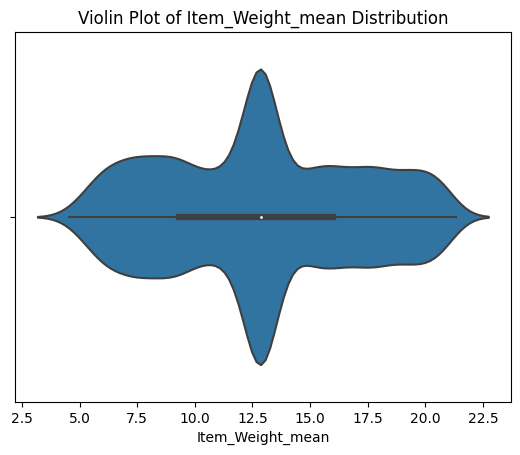

In [28]:
sns.violinplot(x='Item_Weight_mean', data=data)

plt.title('Violin Plot of Item_Weight_mean Distribution')

plt.show()

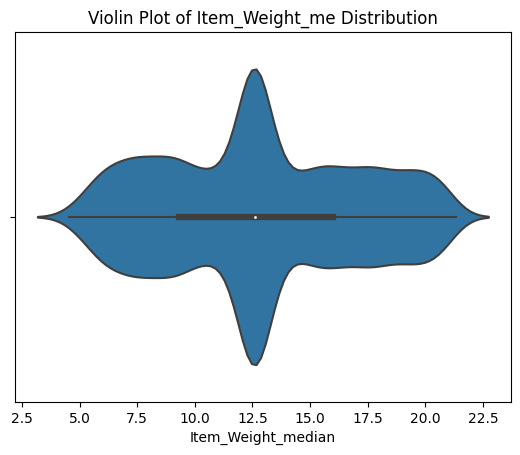

In [29]:
sns.violinplot(x='Item_Weight_median', data=data)

plt.title('Violin Plot of Item_Weight_me Distribution')

plt.show()

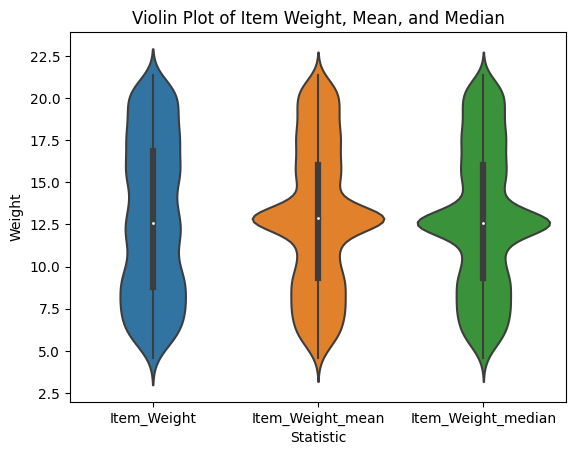

In [30]:
concatenated_data = pd.concat([data['Item_Weight'], data['Item_Weight_mean'], data['Item_Weight_median']], axis=1)
concatenated_data.columns = ['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']


melted_data = concatenated_data.melt(var_name='Statistic', value_name='Weight')


sns.violinplot(x='Statistic', y='Weight', data=melted_data)


plt.xlabel('Statistic')
plt.ylabel('Weight')
plt.title('Violin Plot of Item Weight, Mean, and Median')


plt.show()

In [31]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

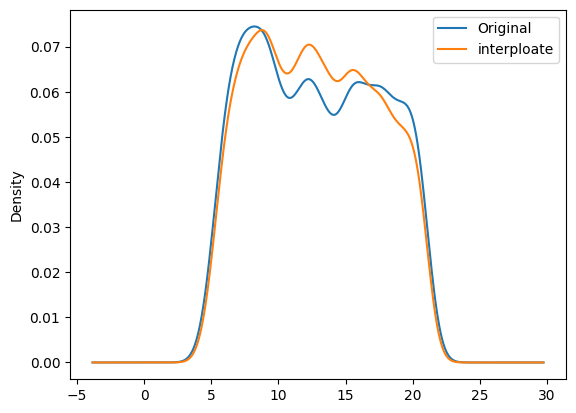

In [32]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

In [33]:
from sklearn.impute import KNNImputer

In [34]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [35]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

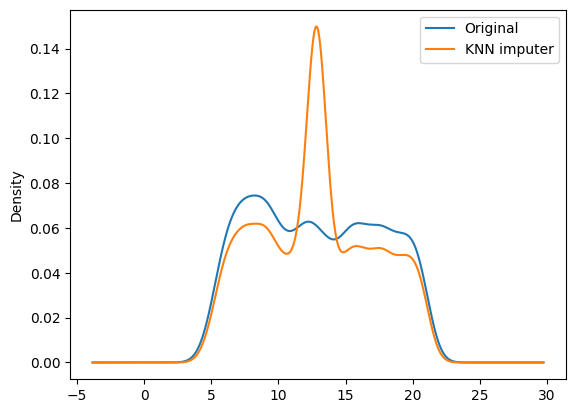

In [36]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [39]:
knn_2 = KNNImputer(n_neighbors=20,weights="distance")

In [40]:
data['knn_2_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

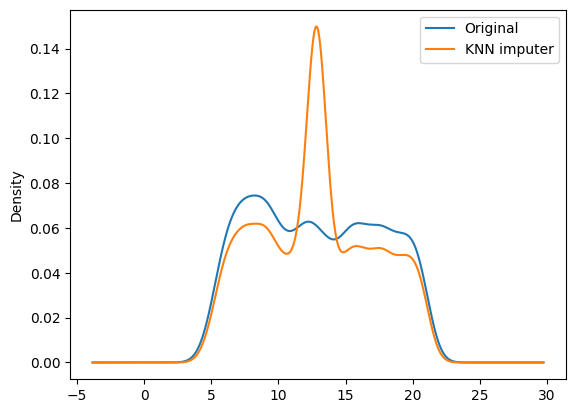

In [41]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_2_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [42]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer','knn_2_imputer'],axis=1)

In [43]:
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [44]:
data.isnull()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,True,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [46]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [47]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [48]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [49]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [50]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [51]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [52]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [53]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [54]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [55]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [56]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [57]:
data['Item_Fat_Content'].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [58]:
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [59]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [60]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [62]:
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [63]:
data['Item_Visibility_interpolate'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

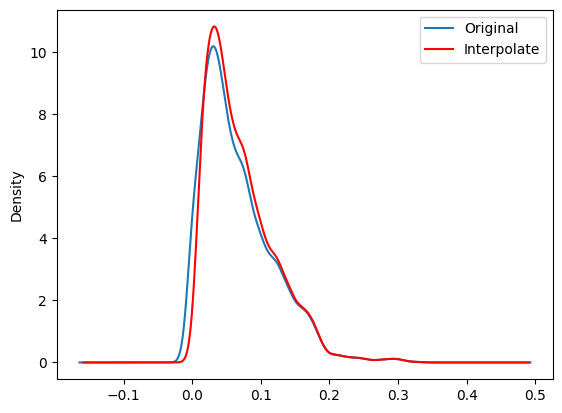

In [64]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [65]:
data = data.drop('Item_Visibility',axis=1)

In [66]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [67]:
data['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [68]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [69]:
data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [70]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [71]:
data['Item_Identifier'].value_counts().sample(5)

FDZ46     4
DRB13     5
FDW13    10
DRF01     8
DRN37     6
Name: Item_Identifier, dtype: int64

In [72]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [73]:
data['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [74]:
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [75]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [76]:
import datetime as dt

In [77]:
current_year = dt.datetime.today().year
current_year

2024

In [78]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [79]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [80]:
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [81]:
from sklearn.preprocessing import OrdinalEncoder

In [82]:
data_encoded = data.copy()

In [83]:
cat_cols = data.select_dtypes(include=['object']).columns

In [84]:
for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])

In [85]:
data_encoded.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


In [86]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,15


In [87]:
y = data_encoded['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [89]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,140.992782,2181.288914,12.831222,0.070340,26.168133
std,62.275067,1706.499616,4.445074,0.049493,8.371760
min,31.290000,33.290000,4.555000,0.003575,15.000000
25%,93.826500,834.247400,9.000000,0.032405,20.000000
50%,143.012800,1794.331000,12.600000,0.058182,25.000000
75%,185.643700,3101.296400,16.600000,0.097094,37.000000
max,266.888400,13086.964800,21.350000,0.328391,39.000000


In [90]:
sns.set()

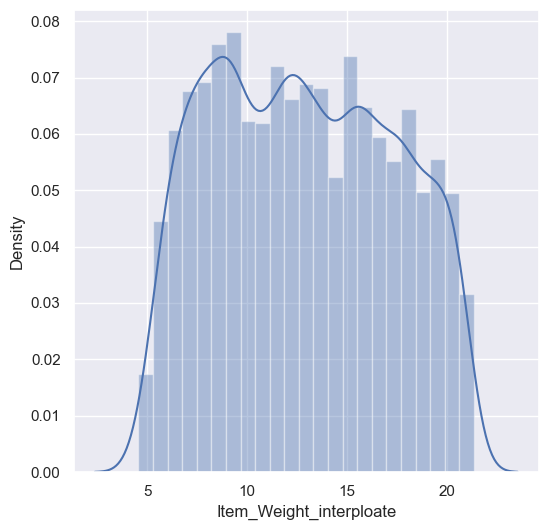

In [94]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Weight_interploate'])
plt.show()

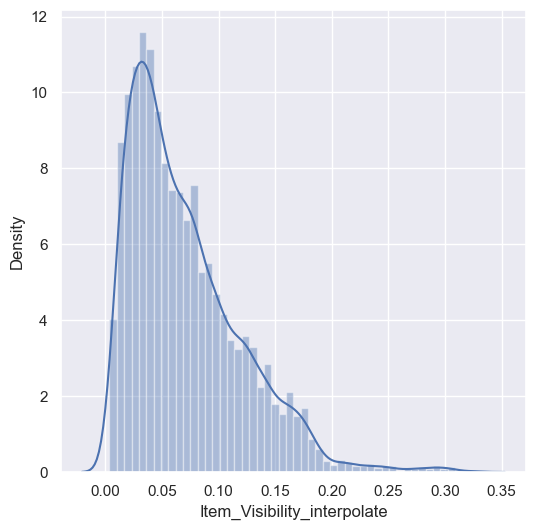

In [95]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Visibility_interpolate'])
plt.show()

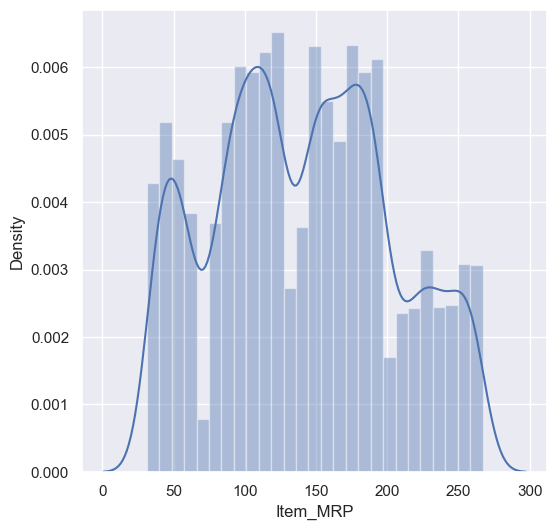

In [96]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'])
plt.show()

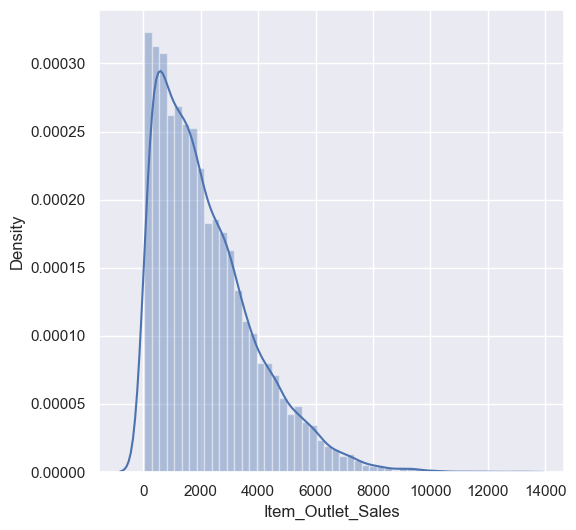

In [98]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

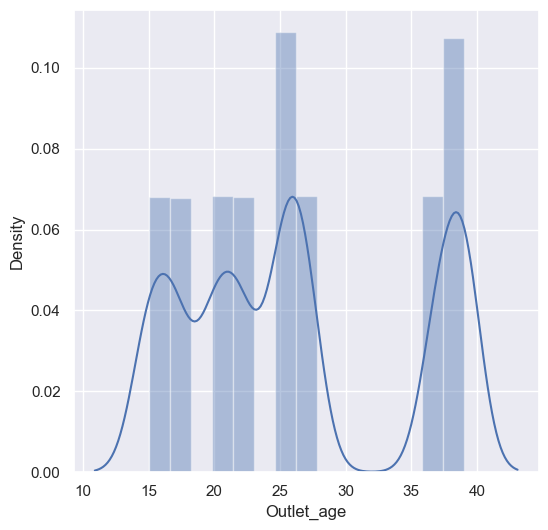

In [99]:
# Outlet_Age column
plt.figure(figsize=(6,6))
sns.distplot(data['Outlet_age'])
plt.show()

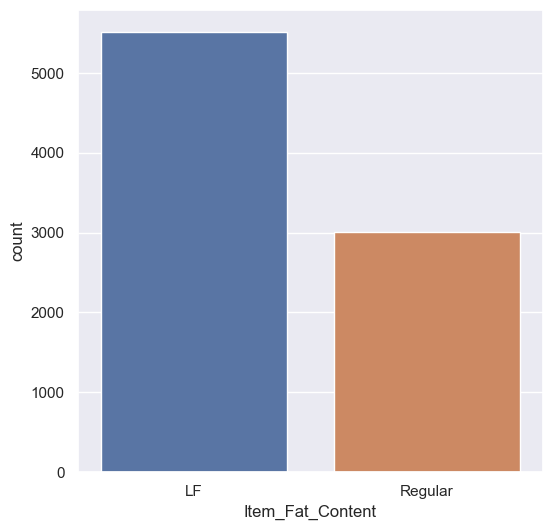

In [100]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

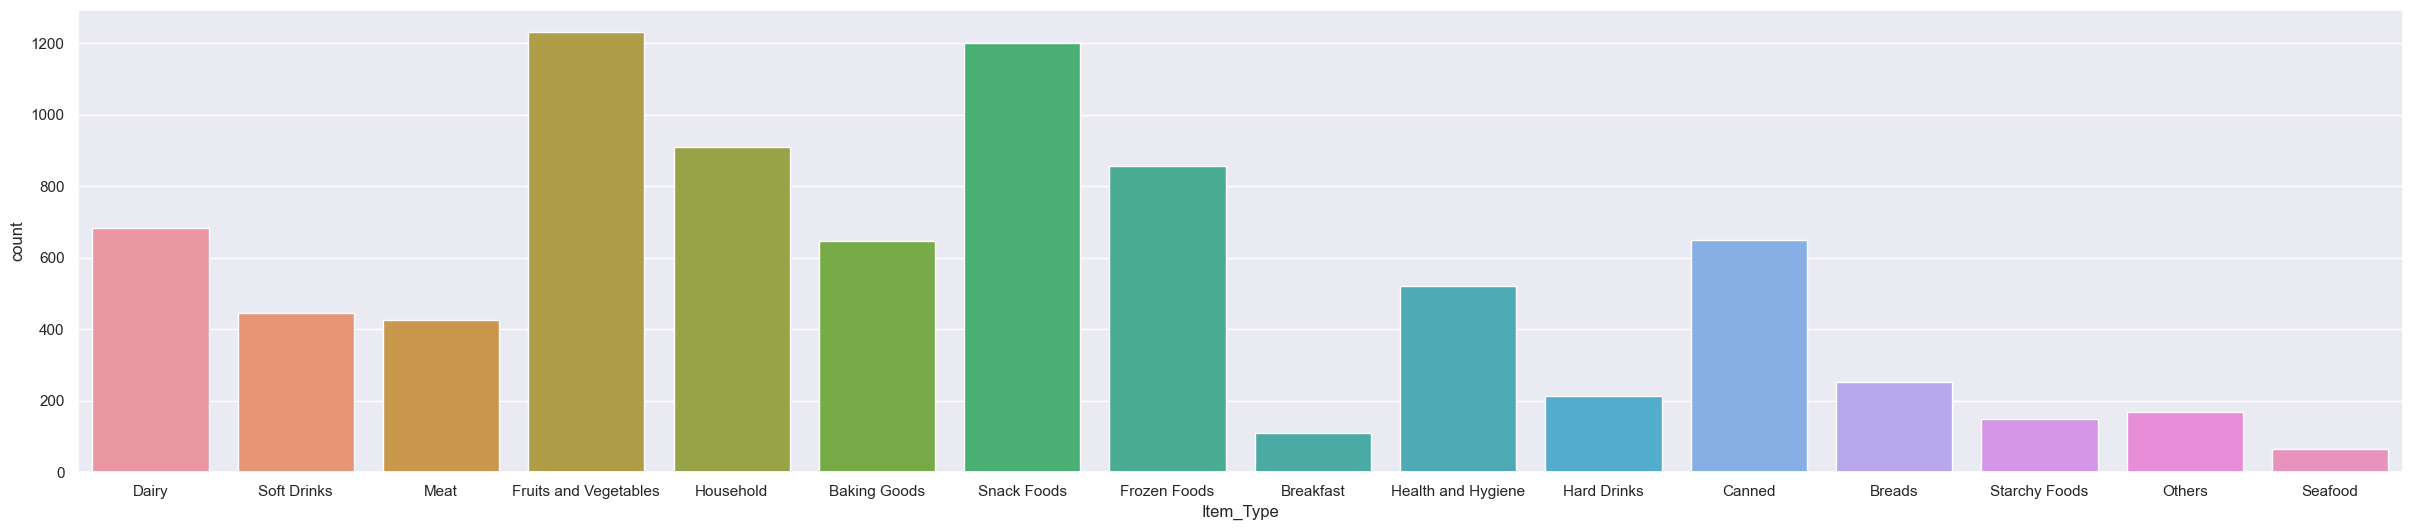

In [101]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

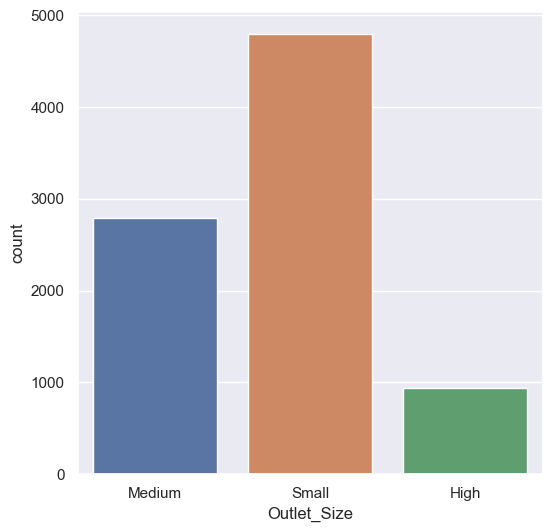

In [102]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

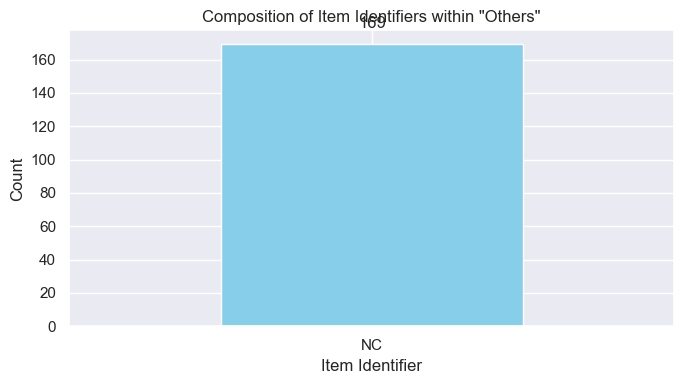

In [114]:
others_data = data[data['Item_Type'] == 'Others']

# Group by 'Item_Identifier' and count occurrences
item_identifier_counts = others_data['Item_Identifier'].value_counts()

# Plotting
plt.figure(figsize=(7, 4))
item_identifier_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Item Identifier')
plt.ylabel('Count')
plt.title('Composition of Item Identifiers within "Others"')
plt.xticks(rotation=0)

for i, count in enumerate(item_identifier_counts):
    plt.text(i, count + 10, str(count), ha='center')


plt.tight_layout()
plt.show()

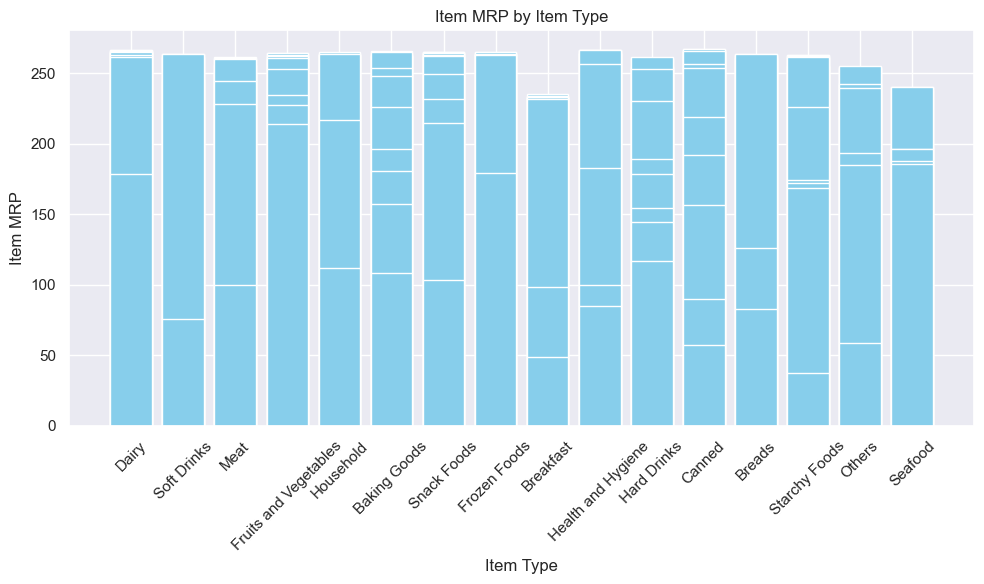

In [118]:
plt.figure(figsize=(10, 6))
bars=plt.bar(data['Item_Type'], data['Item_MRP'], color='skyblue')
plt.xlabel('Item Type')
plt.ylabel('Item MRP')
plt.title('Item MRP by Item Type')
plt.xticks(rotation=45)




plt.tight_layout()
plt.show()

In [122]:
# Calculate average price of each item type
avg_price_by_item_type = data.groupby('Item_Type')['Item_MRP'].mean()

# Convert the Series to a DataFrame for better formatting
avg_price_table = avg_price_by_item_type.reset_index()
avg_price_table.columns = ['Item Type', 'Average Price']

print(avg_price_table)

                Item Type  Average Price
0            Baking Goods     126.380766
1                  Breads     140.952669
2               Breakfast     141.788151
3                  Canned     139.763832
4                   Dairy     148.499208
5            Frozen Foods     138.503366
6   Fruits and Vegetables     144.581235
7             Hard Drinks     137.077928
8      Health and Hygiene     130.818921
9               Household     149.424753
10                   Meat     139.882032
11                 Others     132.851430
12                Seafood     141.841719
13            Snack Foods     146.194934
14            Soft Drinks     131.492506
15          Starchy Foods     147.838023


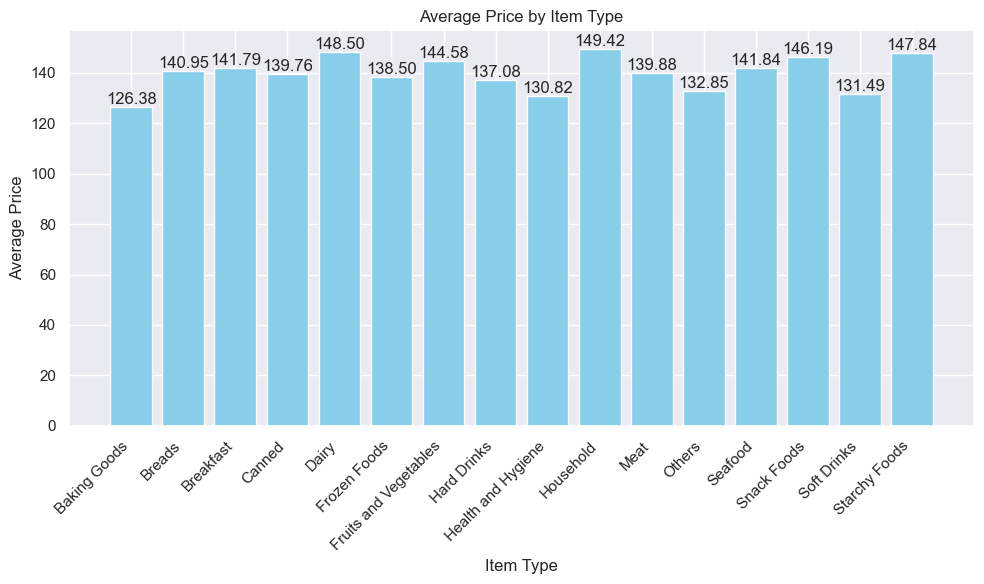

In [123]:
# Calculate average price of each item type
avg_price_by_item_type = data.groupby('Item_Type')['Item_MRP'].mean()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_price_by_item_type.index, avg_price_by_item_type.values, color='skyblue')
plt.xlabel('Item Type')
plt.ylabel('Average Price')
plt.title('Average Price by Item Type')
plt.xticks(rotation=45, ha='right')

# Add annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

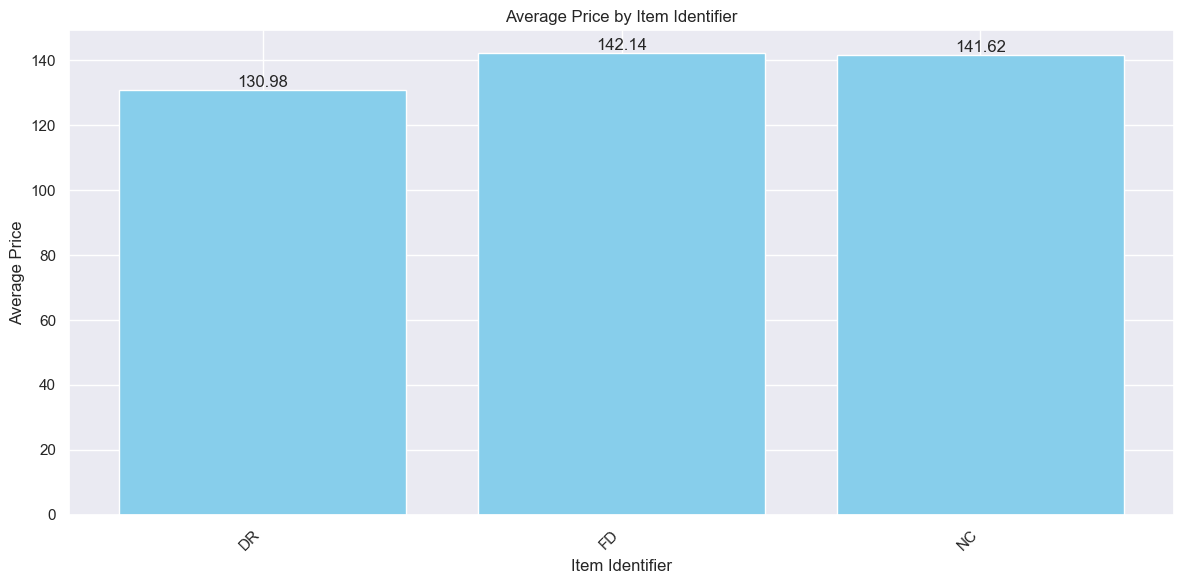

In [125]:
# Calculate average price of each item identifier
avg_price_by_item_identifier = data.groupby('Item_Identifier')['Item_MRP'].mean()

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_by_item_identifier.index, avg_price_by_item_identifier.values, color='skyblue')
plt.xlabel('Item Identifier')
plt.ylabel('Average Price')
plt.title('Average Price by Item Identifier')
plt.xticks(rotation=45, ha='right')

# Add annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [126]:
# Calculate average price for each item identifier
avg_price_by_item_identifier = data.groupby('Item_Identifier')['Item_MRP'].mean().reset_index()
avg_price_by_item_identifier.columns = ['Item_Identifier', 'Avg_Item_Identifier_Value']

# Calculate average price for each item type
avg_price_by_item_type = data.groupby('Item_Type')['Item_MRP'].mean().reset_index()
avg_price_by_item_type.columns = ['Item_Type', 'Avg_Item_Type_Value']

# Merge the two datasets on 'Item_Identifier' to associate each item identifier with its corresponding item type
merged_df = pd.merge(avg_price_by_item_identifier, data[['Item_Identifier', 'Item_Type']], on='Item_Identifier')

# Merge the merged dataset with average price by item type
final_df = pd.merge(merged_df, avg_price_by_item_type, on='Item_Type')

# Print or visualize the final DataFrame to see the relationship between item type, item identifier, average item identifier value, and average item type value
print(final_df)

     Item_Identifier  Avg_Item_Identifier_Value    Item_Type  \
0                 DR                 130.976500  Soft Drinks   
1                 DR                 130.976500  Soft Drinks   
2                 DR                 130.976500  Soft Drinks   
3                 DR                 130.976500  Soft Drinks   
4                 DR                 130.976500  Soft Drinks   
...              ...                        ...          ...   
8518              NC                 141.622424       Others   
8519              NC                 141.622424       Others   
8520              NC                 141.622424       Others   
8521              NC                 141.622424       Others   
8522              NC                 141.622424       Others   

      Avg_Item_Type_Value  
0              131.492506  
1              131.492506  
2              131.492506  
3              131.492506  
4              131.492506  
...                   ...  
8518           132.851430  
8519   

In [132]:
pip install plotly

     ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
      --------------------------------------- 0.2/15.7 MB 6.3 MB/s eta 0:00:03
     -- ------------------------------------- 1.0/15.7 MB 12.3 MB/s eta 0:00:02
     ---- ----------------------------------- 1.8/15.7 MB 14.1 MB/s eta 0:00:01
     ---- ----------------------------------- 1.8/15.7 MB 11.6 MB/s eta 0:00:02
     ------ --------------------------------- 2.4/15.7 MB 11.0 MB/s eta 0:00:02
     ------ --------------------------------- 2.6/15.7 MB 10.5 MB/s eta 0:00:02
     ------- -------------------------------- 2.8/15.7 MB 10.0 MB/s eta 0:00:02
     ------- -------------------------------- 3.1/15.7 MB 8.6 MB/s eta 0:00:02
     -------- ------------------------------- 3.4/15.7 MB 8.6 MB/s eta 0:00:02
     --------- ------------------------------ 3.6/15.7 MB 8.0 MB/s eta 0:00:02
     ---------- ----------------------------- 4.1/15.7 MB 8.4 MB/s eta 0:00:02
     ---------- ----------------------------- 4.1/15.

In [134]:
import plotly.express as px
# Create an interactive scatter plot
fig = px.scatter(final_df, x='Avg_Item_Identifier_Value', y='Avg_Item_Type_Value', text='Item_Identifier', color='Item_Type', hover_name='Item_Identifier', 
                 title='Relationship between Average Item Identifier Value and Average Item Type Value')

# Update layout
fig.update_layout(xaxis_title='Average Item Identifier Value',
                  yaxis_title='Average Item Type Value')

# Adjust axis range for better visualization
fig.update_xaxes(range=[final_df['Avg_Item_Identifier_Value'].min() * 0.95, final_df['Avg_Item_Identifier_Value'].max() * 1.05])
fig.update_yaxes(range=[final_df['Avg_Item_Type_Value'].min() * 0.95, final_df['Avg_Item_Type_Value'].max() * 1.05])

# Show the interactive plot
fig.show()

In [135]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5549992903957147


In [136]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [137]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


In [138]:
#Feature Importance for XGBRF as XGBRF >>> Random Forest
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_interpolate,0.002493
8,Item_Weight_interploate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


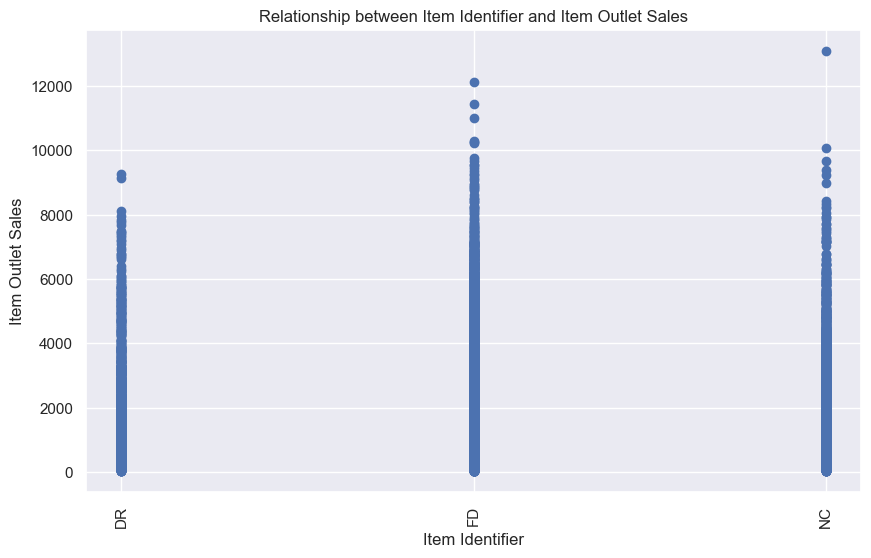

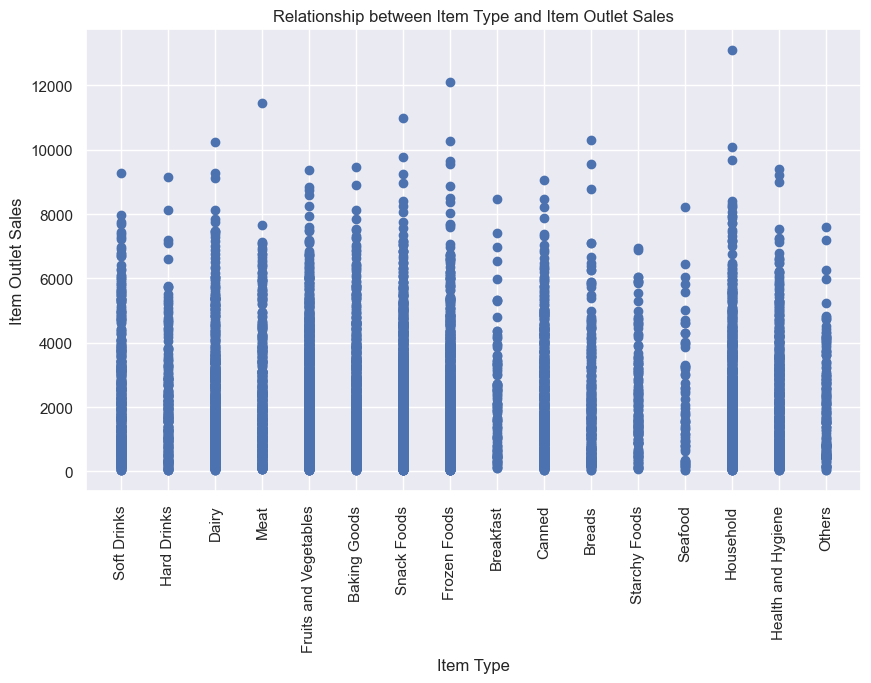

In [141]:
# Scatter plot for 'Item_Identifier' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Item_Identifier'], y)  # Replace 'y' with the correct variable representing 'Item_Outlet_Sales'
plt.xlabel('Item Identifier')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Identifier and Item Outlet Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Scatter plot for 'Item_Type' and 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Item_Type'], y)  # Replace 'y' with the correct variable representing 'Item_Outlet_Sales'
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Relationship between Item Type and Item Outlet Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [147]:
# Calculate mean, median, and standard deviation of sales for each category of 'Item_Identifier'
sales_stats_by_item_identifier = data.groupby('Item_Identifier')['Item_Outlet_Sales'].agg(['mean', 'median', 'std']).reset_index()

# Calculate mean, median, and standard deviation of sales for each category of 'Item_Type'
sales_stats_by_item_type = data.groupby('Item_Type')['Item_Outlet_Sales'].agg(['mean', 'median', 'std']).reset_index()


In [148]:
# Print the results
print("Sales Statistics by Item Identifier:")
print(sales_stats_by_item_identifier)

print("\nSales Statistics by Item Type:")
print(sales_stats_by_item_type)

Sales Statistics by Item Identifier:
  Item_Identifier         mean     median          std
0              DR  1997.333337  1496.7184  1650.197412
1              FD  2215.354223  1810.9760  1732.335220
2              NC  2142.721364  1874.8928  1626.907672

Sales Statistics by Item Type:
                Item_Type         mean     median          std
0            Baking Goods  1952.971207  1577.9460  1546.788045
1                  Breads  2204.132226  1860.2452  1644.235914
2               Breakfast  2111.808651  1554.6430  1911.693586
3                  Canned  2225.194904  1860.2452  1645.235638
4                   Dairy  2232.542597  1650.8511  1884.404698
5            Frozen Foods  2132.867744  1687.1372  1724.777720
6   Fruits and Vegetables  2289.009592  1830.9500  1799.503459
7             Hard Drinks  2139.221622  1816.6353  1606.191587
8      Health and Hygiene  2010.000265  1669.4935  1553.633063
9               Household  2258.784300  1981.4208  1692.245757
10                

In [149]:
pip install shap

     ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
     -- ------------------------------------- 30.7/453.1 kB ? eta -:--:--
     -- ------------------------------------- 30.7/453.1 kB ? eta -:--:--
     ---------- --------------------------- 122.9/453.1 kB 1.2 MB/s eta 0:00:01
     ---------- --------------------------- 122.9/453.1 kB 1.2 MB/s eta 0:00:01
     ---------------- ------------------- 204.8/453.1 kB 958.4 kB/s eta 0:00:01
     ---------------- ------------------- 204.8/453.1 kB 958.4 kB/s eta 0:00:01
     ---------------- ------------------- 204.8/453.1 kB 958.4 kB/s eta 0:00:01
     ---------------- ------------------- 204.8/453.1 kB 958.4 kB/s eta 0:00:01
     ---------------- ------------------- 204.8/453.1 kB 958.4 kB/s eta 0:00:01
     ----------------------------- ------ 368.6/453.1 kB 820.1 kB/s eta 0:00:01
     ------------------------------------ 453.1/453.1 kB 915.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/2.7 MB ? 

In [150]:
import shap

In [156]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score
import numpy as np

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a XGBRFRegressor model
xgb = XGBRFRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Baseline performance
y_pred_baseline = xgb.predict(X_val)
baseline_score = r2_score(y_val, y_pred_baseline)
print("Baseline R-squared:", baseline_score)

# Permutation importance
perm_importance = {}
for col in X_val.columns:
    X_val_permuted = X_val.copy()
    X_val_permuted[col] = np.random.permutation(X_val[col])
    y_pred_permuted = xgb.predict(X_val_permuted)
    permuted_score = r2_score(y_val, y_pred_permuted)
    perm_importance[col] = baseline_score - permuted_score

# Sort features by permutation importance
sorted_perm_importance = sorted(perm_importance.items(), key=lambda x: x[1], reverse=True)

# Print permutation importance scores
print("\nPermutation Importance Scores:")
for feature, importance in sorted_perm_importance:
    print(f"{feature}: {importance}")

Baseline R-squared: 0.6157960968296692

Permutation Importance Scores:
Item_MRP: 0.7143816802173377
Outlet_Type: 0.45842517296014107
Outlet_Identifier: 0.0035210991330552055
Outlet_age: 0.0034564480899066385
Item_Visibility_interpolate: 0.0010860588131351712
Item_Fat_Content: 0.00024589378014971963
Item_Type: 0.00011578411367318964
Item_Identifier: 2.2432613703271542e-05
Outlet_Location_Type: -0.0003162275870800535
Outlet_Size: -0.0004153526781952577
Item_Weight_interploate: -0.00727195093839339


In [ ]:
xgbrf_model.fit(X_train, y_train)

# Create a SHAP explainer object
explainer = shap.Explainer(xgbrf_model, X_train)

# Compute SHAP values
shap_values = explainer.shap_values(X_train)

# Visualize SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, X_train)

In [161]:
data.isnull().sum()

Item_Identifier                0
Item_Fat_Content               0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
Item_Weight_interploate        0
Item_Visibility_interpolate    0
Outlet_age                     0
dtype: int64

In [162]:
print(data_encoded.dtypes)


Item_Identifier                float64
Item_Fat_Content               float64
Item_Type                      float64
Item_MRP                       float64
Outlet_Identifier              float64
Outlet_Size                    float64
Outlet_Location_Type           float64
Outlet_Type                    float64
Item_Outlet_Sales              float64
Item_Weight_interploate        float64
Item_Visibility_interpolate    float64
Outlet_age                       int64
dtype: object


In [176]:
final_data = data.copy()

 97%|=================== | 8242/8523 [00:21<00:00]       

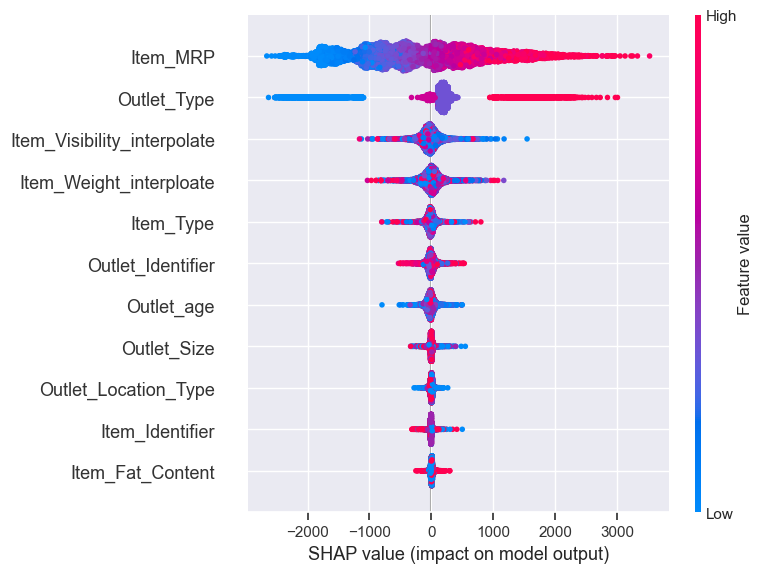

In [180]:
import xgboost as xgb
import shap

# Train your XGBoost model
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X, y)

# Create a Shapley explainer
explainer = shap.Explainer(xgboost_model, X)

# Calculate Shapley values for all instances
shap_values = explainer.shap_values(X)

# Plot the Shapley values
shap.summary_plot(shap_values, X)



In [181]:
#Calculate Shapley values for all instances
shap_values = explainer.shap_values(X)

# Calculate mean absolute Shapley values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)

# Print summary of mean absolute Shapley values
print("Summary of Shapley Values:")
for feature, mean_shap in zip(X.columns, mean_shap_values):
    print(f"{feature}: {mean_shap}")

100%|===================| 8496/8523 [00:22<00:00]        

Summary of Shapley Values:
Item_Identifier: 19.277325061106485
Item_Fat_Content: 18.692962326645116
Item_Type: 55.62746311211022
Item_MRP: 842.2671535564995
Outlet_Identifier: 53.50583452542938
Outlet_Size: 22.685638834696643
Outlet_Location_Type: 19.462365859329395
Outlet_Type: 534.2252458884278
Item_Weight_interploate: 112.10120545097925
Item_Visibility_interpolate: 113.86497931411583
Outlet_age: 51.00783234626158


In [182]:
final_data_2 = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [183]:

final_data_2

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,4.0,249.8092,9.0,1.0,1.0,25
1,14.0,48.2692,3.0,1.0,2.0,15
2,10.0,141.6180,9.0,1.0,1.0,25
3,6.0,182.0950,0.0,2.0,0.0,26
4,9.0,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...,...
8518,13.0,214.5218,1.0,0.0,1.0,37
8519,0.0,108.1570,7.0,2.0,1.0,22
8520,8.0,85.1224,6.0,2.0,1.0,20
8521,13.0,103.1332,3.0,1.0,2.0,15


In [185]:
final_data_2.head(5)

,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,4.0,249.8092,9.0,1.0,1.0,25
1,14.0,48.2692,3.0,1.0,2.0,15
2,10.0,141.6180,9.0,1.0,1.0,25
3,6.0,182.0950,0.0,2.0,0.0,26
4,9.0,53.8614,1.0,0.0,1.0,37


In [186]:
#Final XGBRF model as more accurate
from xgboost import XGBRFRegressor

In [193]:
xg = XGBRFRegressor(enable_categorical=True)

In [194]:
xg_final.fit(final_data_2,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [198]:
X_train,X_test,y_train,y_test = train_test_split(final_data_2,y,test_size=0.20,random_state=42)

In [199]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [200]:
y_pred = xg_final.predict(X_test)

In [201]:
mean_absolute_error(y_test,y_pred)

713.6161661122574

In [212]:
# R squared Value
r2_test = metrics.r2_score(y_test, y_pred)

In [213]:
print('R Squared value = ', r2_test)

R Squared value =  0.6170491247018335


In [215]:
#Unseen Data
pred = xg_final.predict(np.array([[4.0,85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

1446.5239


In [217]:
print(f"Sales Value is between {pred-713.61} and {pred+713.61}")

Sales Value is between 732.91392578125 and 2160.13392578125


In [218]:
import joblib

In [219]:
joblib.dump(xg_final,'SalesSense_sales_pred_model')

['SalesSense_sales_pred_model']

In [220]:
model = joblib.load('SalesSense_sales_pred_model')

In [221]:
pred = model.predict(np.array([[4.0,85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

print(f"Sales Value is between {pred-713.61} and {pred+713.61}")

1446.5239
Sales Value is between 732.91392578125 and 2160.13392578125


In [222]:
pred = model.predict(np.array([[4.0,141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

print(f"Sales Value is between {pred-713.61} and {pred+713.61}")

2020.433
Sales Value is between 1306.8229833984374 and 2734.0429833984376


In [231]:
pred = model.predict(np.array([[5.0,141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

print(f"Sales Value is between {pred-713.61} and {pred+713.61}")

2020.433
Sales Value is between 1306.8229833984374 and 2734.0429833984376


In [234]:
# Group the data by item type and aggregate item identifiers
item_type_identifier_mapping = data.groupby('Item_Type')['Item_Identifier'].unique()

# Print the mapping
print("Item Type - Item Identifier Mapping:")
for item_type, identifiers in item_type_identifier_mapping.items():
    print(f"{item_type}: {identifiers}")


Item Type - Item Identifier Mapping:
Baking Goods: ['FD']
Breads: ['FD']
Breakfast: ['FD']
Canned: ['FD']
Dairy: ['FD' 'DR']
Frozen Foods: ['FD']
Fruits and Vegetables: ['FD']
Hard Drinks: ['DR']
Health and Hygiene: ['NC']
Household: ['NC']
Meat: ['FD']
Others: ['NC']
Seafood: ['FD']
Snack Foods: ['FD']
Soft Drinks: ['DR']
Starchy Foods: ['FD']


In [235]:
# Calculate the frequency of each Item Identifier per Item Type
identifier_frequency = data.groupby(['Item_Type', 'Item_Identifier']).size().reset_index(name='Frequency')

# Display the frequency table
print(identifier_frequency)


                Item_Type Item_Identifier  Frequency
0            Baking Goods              FD        648
1                  Breads              FD        251
2               Breakfast              FD        110
3                  Canned              FD        649
4                   Dairy              DR        140
5                   Dairy              FD        542
6            Frozen Foods              FD        856
7   Fruits and Vegetables              FD       1232
8             Hard Drinks              DR        214
9      Health and Hygiene              NC        520
10              Household              NC        910
11                   Meat              FD        425
12                 Others              NC        169
13                Seafood              FD         64
14            Snack Foods              FD       1200
15            Soft Drinks              DR        445
16          Starchy Foods              FD        148


In [236]:
# Calculate the total sales volume (sum of Item_Outlet_Sales) for each Item Identifier per Item Type
sales_volume = data.groupby(['Item_Type', 'Item_Identifier'])['Item_Outlet_Sales'].sum().reset_index(name='Sales_Volume')

# Display the sales volume table
print(sales_volume)


                Item_Type Item_Identifier  Sales_Volume
0            Baking Goods              FD  1.265525e+06
1                  Breads              FD  5.532372e+05
2               Breakfast              FD  2.322990e+05
3                  Canned              FD  1.444151e+06
4                   Dairy              DR  2.451782e+05
5                   Dairy              FD  1.277416e+06
6            Frozen Foods              FD  1.825735e+06
7   Fruits and Vegetables              FD  2.820060e+06
8             Hard Drinks              DR  4.577934e+05
9      Health and Hygiene              NC  1.045200e+06
10              Household              NC  2.055494e+06
11                   Meat              FD  9.175656e+05
12                 Others              NC  3.255176e+05
13                Seafood              FD  1.488682e+05
14            Snack Foods              FD  2.732786e+06
15            Soft Drinks              DR  8.928977e+05
16          Starchy Foods              FD  3.514

In [238]:
final_data_3 = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate','Outlet_Location_Type','Item_Fat_Content'],axis=1)

In [240]:
final_data_3

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,1.0,4.0,249.8092,9.0,1.0,1.0,25
1,0.0,14.0,48.2692,3.0,1.0,2.0,15
2,1.0,10.0,141.6180,9.0,1.0,1.0,25
3,1.0,6.0,182.0950,0.0,2.0,0.0,26
4,2.0,9.0,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...,...,...
8518,1.0,13.0,214.5218,1.0,0.0,1.0,37
8519,1.0,0.0,108.1570,7.0,2.0,1.0,22
8520,2.0,8.0,85.1224,6.0,2.0,1.0,20
8521,1.0,13.0,103.1332,3.0,1.0,2.0,15


In [241]:
final_data_3.head(5)

,Item_Identifier,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,1.0,4.0,249.8092,9.0,1.0,1.0,25
1,0.0,14.0,48.2692,3.0,1.0,2.0,15
2,1.0,10.0,141.6180,9.0,1.0,1.0,25
3,1.0,6.0,182.0950,0.0,2.0,0.0,26
4,2.0,9.0,53.8614,1.0,0.0,1.0,37


In [243]:
xg_final.fit(final_data_3,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [245]:
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(final_data_3,y,test_size=0.20,random_state=42)

In [246]:
xg_final.fit(X_2_train,y_2_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [247]:
y_pred_2 = xg_final.predict(X_2_test)

In [251]:
mean_absolute_error(y_2_test,y_pred_2)

712.8683235021937

In [253]:
# R squared Value
r2_test_2 = metrics.r2_score(y_2_test, y_pred_2)

In [255]:
print('R Squared value = ', r2_test_2)

R Squared value =  0.6182306966214035


In [256]:
#Unseen Data
pred = xg_final.predict(np.array([[2.0,4.0,85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

1440.0438


In [257]:
#Unseen Data
pred = xg_final.predict(np.array([[0.0,4.0,85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

1433.3417


In [258]:
#Unseen Data
pred = xg_final.predict(np.array([[1.0,4.0,85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

1440.2197


In [259]:
print(f"Sales Value is between {pred-712.86} and {pred+712.86}")

Sales Value is between 727.3597265625 and 2153.0797265625


In [260]:
joblib.dump(xg_final,'SalesSense_sales_pred_2_model')

['SalesSense_sales_pred_2_model']

In [261]:
model_2 = joblib.load('SalesSense_sales_pred_2_model')

In [262]:
pred_2 = model_2.predict(np.array([[2.0,4.0,85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

1440.2197


In [2]:
import joblib
model_3 = joblib.load('SalesSense_sales_pred_2_model')

In [7]:
import numpy as np
pred_3 = model_3.predict(np.array([[2.0,4.0,85.1224,9.0,1.0,1.0,21]]))[0]
print(pred_3)

1440.0438


In [10]:
import pandas as pd

# Assuming you have two DataFrames: freq_df for frequency analysis and sales_df for sales volume analysis
data = pd.read_csv('train.csv')

# Frequency Analysis
freq_df = data.groupby(['Item_Type', 'Item_Identifier']).size().reset_index(name='Frequency')

# Sales Volume Analysis
sales_df = data.groupby(['Item_Type', 'Item_Identifier'])['Item_Outlet_Sales'].sum().reset_index(name='Sales_Volume')

# Display the results
print("Frequency of Item Identifiers per Item Type:")
print(freq_df)

print("\nSales Volume per Item Identifier per Item Type:")
print(sales_df)


Frequency of Item Identifiers per Item Type:
          Item_Type Item_Identifier  Frequency
0      Baking Goods           FDA11          5
1      Baking Goods           FDA23          6
2      Baking Goods           FDA35          4
3      Baking Goods           FDA36          4
4      Baking Goods           FDA47          6
...             ...             ...        ...
1554  Starchy Foods           FDG59          6
1555  Starchy Foods           FDH35          6
1556  Starchy Foods           FDH47          6
1557  Starchy Foods           FDI35          3
1558  Starchy Foods           FDZ34          3

[1559 rows x 3 columns]

Sales Volume per Item Identifier per Item Type:
          Item_Type Item_Identifier  Sales_Volume
0      Baking Goods           FDA11     8319.8368
1      Baking Goods           FDA23    11536.9824
2      Baking Goods           FDA35    11638.1840
3      Baking Goods           FDA36     7958.9732
4      Baking Goods           FDA47    17290.8260
...             .